# Classifying Flower Species using Iris Specie Dataset

### -> Importing necessary Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

### -> Loading the Iris Specie Dataset

In [2]:
# Loading the dataset
flower_data = pd.read_csv("Iris.csv")

### -> Reading Head and Tail of dataset

In [3]:
# Printing head of dataset
print(flower_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Removing the id column since it is not of our purpose
flower_data.drop('Id', axis=1, inplace=True)
print(flower_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Printing tail of dataset
print(flower_data.tail())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica


### -> Checking for null-values and printing information

In [6]:
# Checking for missing values
print(flower_data.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
print(flower_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
# Get basic statistics
print(flower_data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### -> Splitting the dataset

In [9]:
# Defining independent vairable (X) and dependent variable (Y)
X = flower_data.drop('Species', axis=1)
Y = flower_data['Species']

# Splitting the dataset into training and testing set in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### -> Training the Decision Tree Classifier model

In [10]:
# Creating instance of model
dtc_model = DecisionTreeClassifier()

# Training the model on training data
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
print(dtc_model.score(X_train, Y_train))

1.0


### -> Classifying flower species using test data 

In [12]:
Y_pred = dtc_model.predict(X_test)

### -> Printing classification report and confusion matrix

In [13]:
print("Classification Report\n")
print(classification_report(Y_test, Y_pred))

Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
print('Confusion Matrix\n')
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### -> Visualizing the decision tree

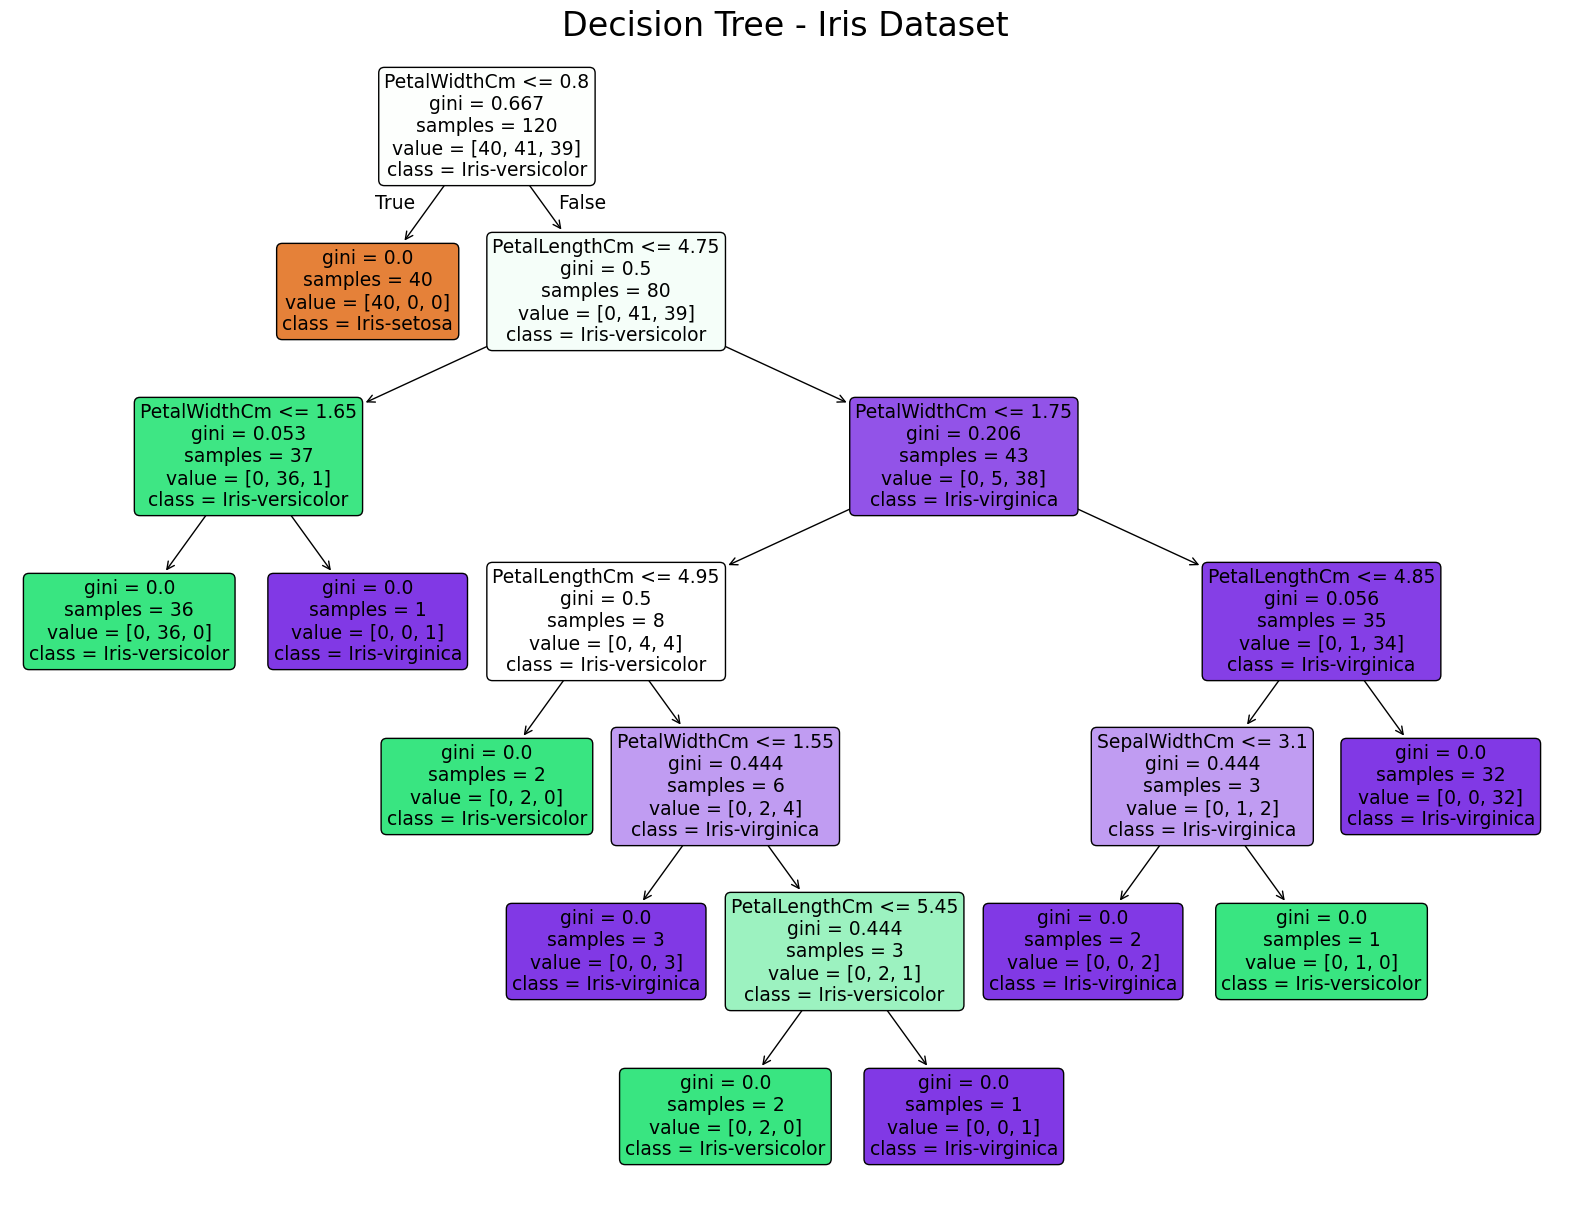

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dtc_model, feature_names=X.columns, class_names=Y.unique(), filled=True, rounded=True)
plt.title("Decision Tree - Iris Dataset", fontsize=24)
plt.show()